In [2]:
import glob
import pandas as pd
from ML2_lib import RV_SGDAve
from ML2_lib import loss
from ML2_lib import plot_set
import numpy as np
import datetime
import pickle
import os

from tqdm import tqdm_notebook as tqdm

In [30]:


files = glob.glob("../remote_exp/remote_save_result/Ackley_2d_trajectory10:27:11:39:23/*")
len(files)

24

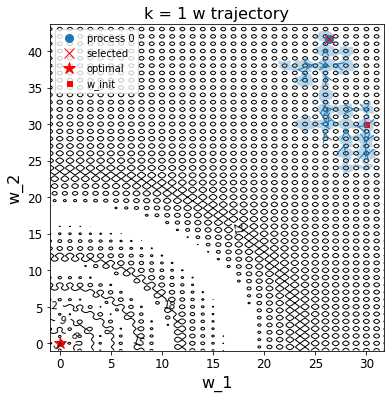

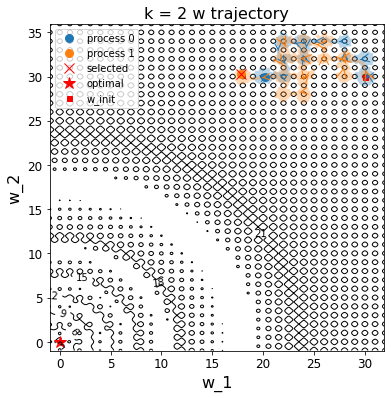

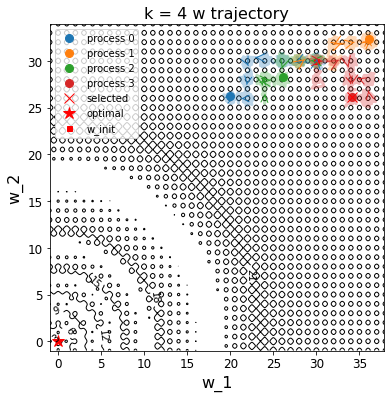

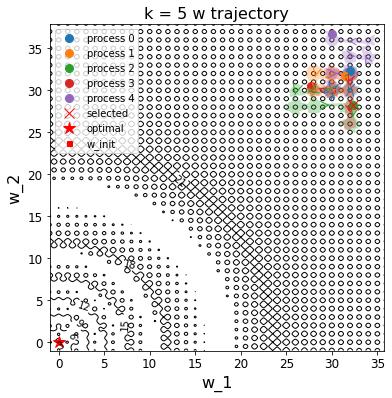

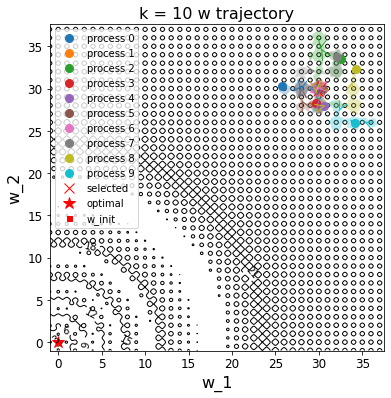

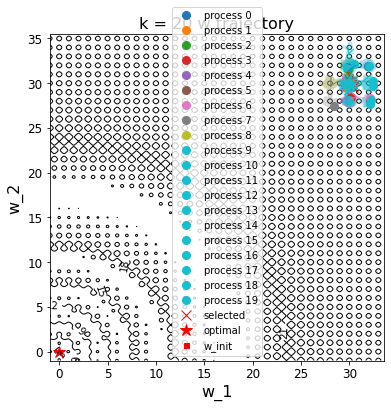

In [36]:
d = {}
n = 10000
noise = "lognormal"
k_list = [1, 2, 4, 5, 10, 20]
son = loss.Ackley(d=2, noise_type=noise, E_var=1.75)
# now = datetime.datetime.now()
now = "0122"
new_dir_path_recursive = f"save_result_data/{son.name}_additional_total_2d_trajectory_image_{now}"
os.makedirs(new_dir_path_recursive,exist_ok=True)
for file in files:

    content = file.split("/")[-1]
    title = f"{content}"

    if "_30_30" in title and "student" in title and "va_3" in title:

        with open(file, mode="rb") as f:
            d = pickle.load(f)
        k_core_list,k_selected_index = d["k_core_list"],d["k_selected_index"]
        plot_set.multiple_w_value_2d_k_candidates_contour(k_list=k_list, k_list_core_store=k_core_list, _t_max=n,
                                                      k_selected_index=k_selected_index, f=son,title=title,levels=7,folder_title=new_dir_path_recursive,saving_png=True)